In [1]:
import pandas as pd
import re

# Load data from your database
import sqlite3
conn = sqlite3.connect("imdb_reviews.db")
reviews_df = pd.read_sql_query("SELECT * FROM imdb_reviews", conn)

# Define a cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning to the review_text column
reviews_df['cleaned_review'] = reviews_df['review_text'].apply(clean_text)

# Check for duplicates and remove them
reviews_df = reviews_df.drop_duplicates(subset=['cleaned_review'])

# Print the first few rows of cleaned data
print(reviews_df.head())


   id                                        review_text sentiment  \
0   1  I rented I AM CURIOUS-YELLOW from my video sto...  negative   
1   2  "I Am Curious: Yellow" is a risible and preten...  negative   
2   3  If only to avoid making this type of film in t...  negative   
3   4  This film was probably inspired by Godard's Ma...  negative   
4   5  Oh, brother...after hearing about this ridicul...  negative   

                                      cleaned_review  
0  i rented i am curiousyellow from my video stor...  
1  i am curious yellow is a risible and pretentio...  
2  if only to avoid making this type of film in t...  
3  this film was probably inspired by godards mas...  
4  oh brotherafter hearing about this ridiculous ...  


sentiment
positive    24884
negative    24696
Name: count, dtype: int64


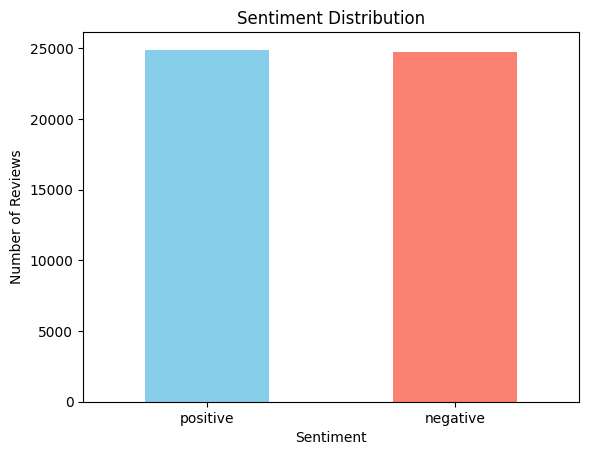

In [2]:
# Sentiment distribution
sentiment_counts = reviews_df['sentiment'].value_counts()
print(sentiment_counts)

# Plot the distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


sentiment
negative    1223.231738
positive    1257.540146
Name: review_length, dtype: float64


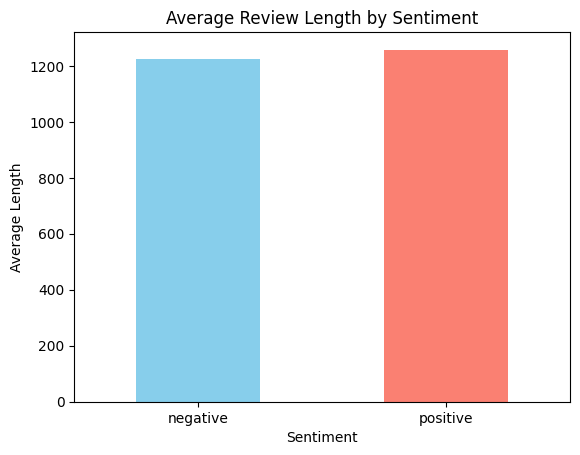

In [3]:
# Add a column for review length
reviews_df['review_length'] = reviews_df['cleaned_review'].apply(len)

# Average review length per sentiment
avg_length = reviews_df.groupby('sentiment')['review_length'].mean()
print(avg_length)

# Visualize the comparison
avg_length.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Length')
plt.xticks(rotation=0)
plt.show()


In [4]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\priya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


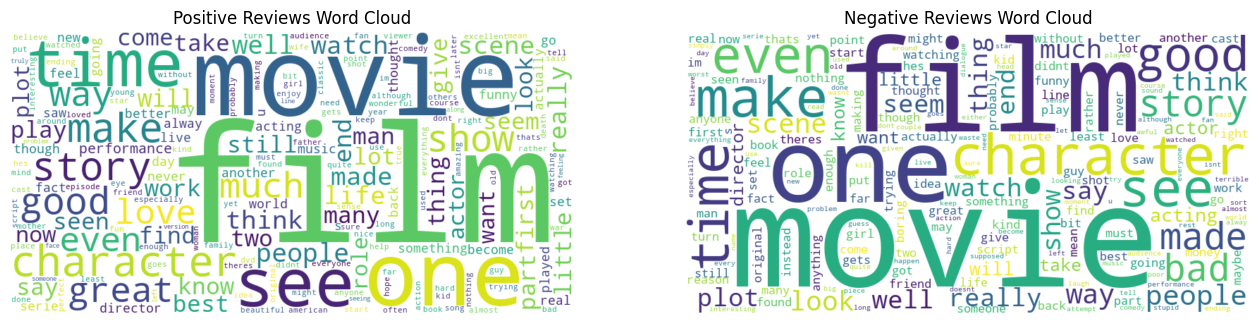

In [5]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = " ".join(reviews_df[reviews_df['sentiment'] == 'positive']['cleaned_review'])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = " ".join(reviews_df[reviews_df['sentiment'] == 'negative']['cleaned_review'])
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title("Positive Reviews Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title("Negative Reviews Word Cloud")
plt.axis("off")

plt.show()
